<h1 style="font-size: 20px; color: blue;">Bike Sharing System Assignment</h1>

<h2 style="font-size: 20px;">Breaking Down the Steps</h2>
<h3 style="font-size: 14px;">Step 1: Reading and Understanding the data from the database</h3>
<h3 style="font-size: 14px;">Step 2: Performing Linear Regression</h3>
<h3 style="font-size: 14px;">Step 3: Building Linear model - 1</h3>
<h3 style="font-size: 14px;">Step 4: Building Linear model - 2</h3>
<h3 style="font-size: 14px;">Step 5: Building Linear model - 3</h3>
<h3 style="font-size: 14px;">Step 6: Building Linear model - 4</h3>
<h3 style="font-size: 14px;">Step 7: Building Linear model - 5</h3>
<h3 style="font-size: 14px;">Step 8: Residual Analysis of the train data</h3>
<h3 style="font-size: 14px;">Step 9: Making Predictions Using the Final Model</h3>
<h3 style="font-size: 14px;">Step 10: Conclusion</h3>
<h3 style="font-size: 12px;">#Best fitted line</h3>
<h3 style="font-size: 12px;">#Summary of Train and Test set</h3>
<h3 style="font-size: 12px;">#Predicted variable as per the model in bike rental strategy</h3>

<h3 style="font-size: 24px; color: Maroon">Step 1: Reading & Understanding the data </h3>

<h3 style="font-size: 12px; color: magenta;">Step 1.1: importing the required libraries</h3>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# import basic libraries
import numpy as np
import pandas as pd

# import required libraries(visualization)
import matplotlib.pyplot as plt
import seaborn as sns

# import required libraries(to perorm regression model, statsmodels and scikit models both imported to observe the difference)
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import required libraries(train, test data and scaling)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# importing required libraries to build the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# importing required libraries for residual analysis
from scipy import stats

# importing required libraries for RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<h3 style="font-size: 12px; color: magenta;">Step 1.2: Load, Read and understand the database</h3>
# Read the CSV file
# Display the first few rows of the dataframe
#basic database information
#overall database information

In [2]:
# Read the CSV file
bike_sharing = pd.read_csv("Data_base_bike.csv")

# Display the first few rows of the dataframe
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#basic database information
bike_sharing.shape

(730, 16)

In [4]:
#overall database information
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<h3 style="font-size: 12px; color: purple;">Data Understanding (categorical variables)</h3>
Total 16 Column as Variables adn 730 Rows as variable data.
#Out of that 7 are Catagorical variables
#season: Likely represents different seasons (e.g., winter, spring, summer, autumn).
#yr: Likely represents different years (e.g., 2011, 2012).
#mnth: Likely represents different months (e.g., January, February).
#holiday: Likely a binary variable indicating whether the day is a holiday or not.
#weekday: Likely represents different days of the week (e.g., Monday, Tuesday).
#workingday: Likely a binary variable indicating whether the day is a working day or not.
#weathersit: Likely represents different weather situations (e.g., clear, cloudy, rainy).

<h3 style="font-size: 12px; color: purple;">Data Understanding (Numerical variables)</h3>
Total 16 Column as Variables adn 730 Rows as variable data.
#Out of that 8 are Numerical variables
#instant: unique identifier for each record.
#dteday: Date variable
#temp: represents temperature, a continuous numerical variable.
#atemp: temperature, also a continuous numerical variable.
#hum: represents humidity, a continuous numerical variable.
#windspeed: represents wind speed, a continuous numerical variable.
#casual: represents the count of casual users (e.g., non-registered users), a discrete numerical variable.
#registered: represents the count of registered users, a discrete numerical variable.
#cnt: represents the total count of users (sum of casual and registered), a discrete numerical variable

In [5]:
#summary statistics of database.
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<h3 style="font-size: 12px; color: magenta;">Step 1.3: Visualize the DATABASE</h3>
# Pair Plot Numerical Variable
# Understanding of pair plot and observations
# Heat map
# box Plot Catagorical Variable

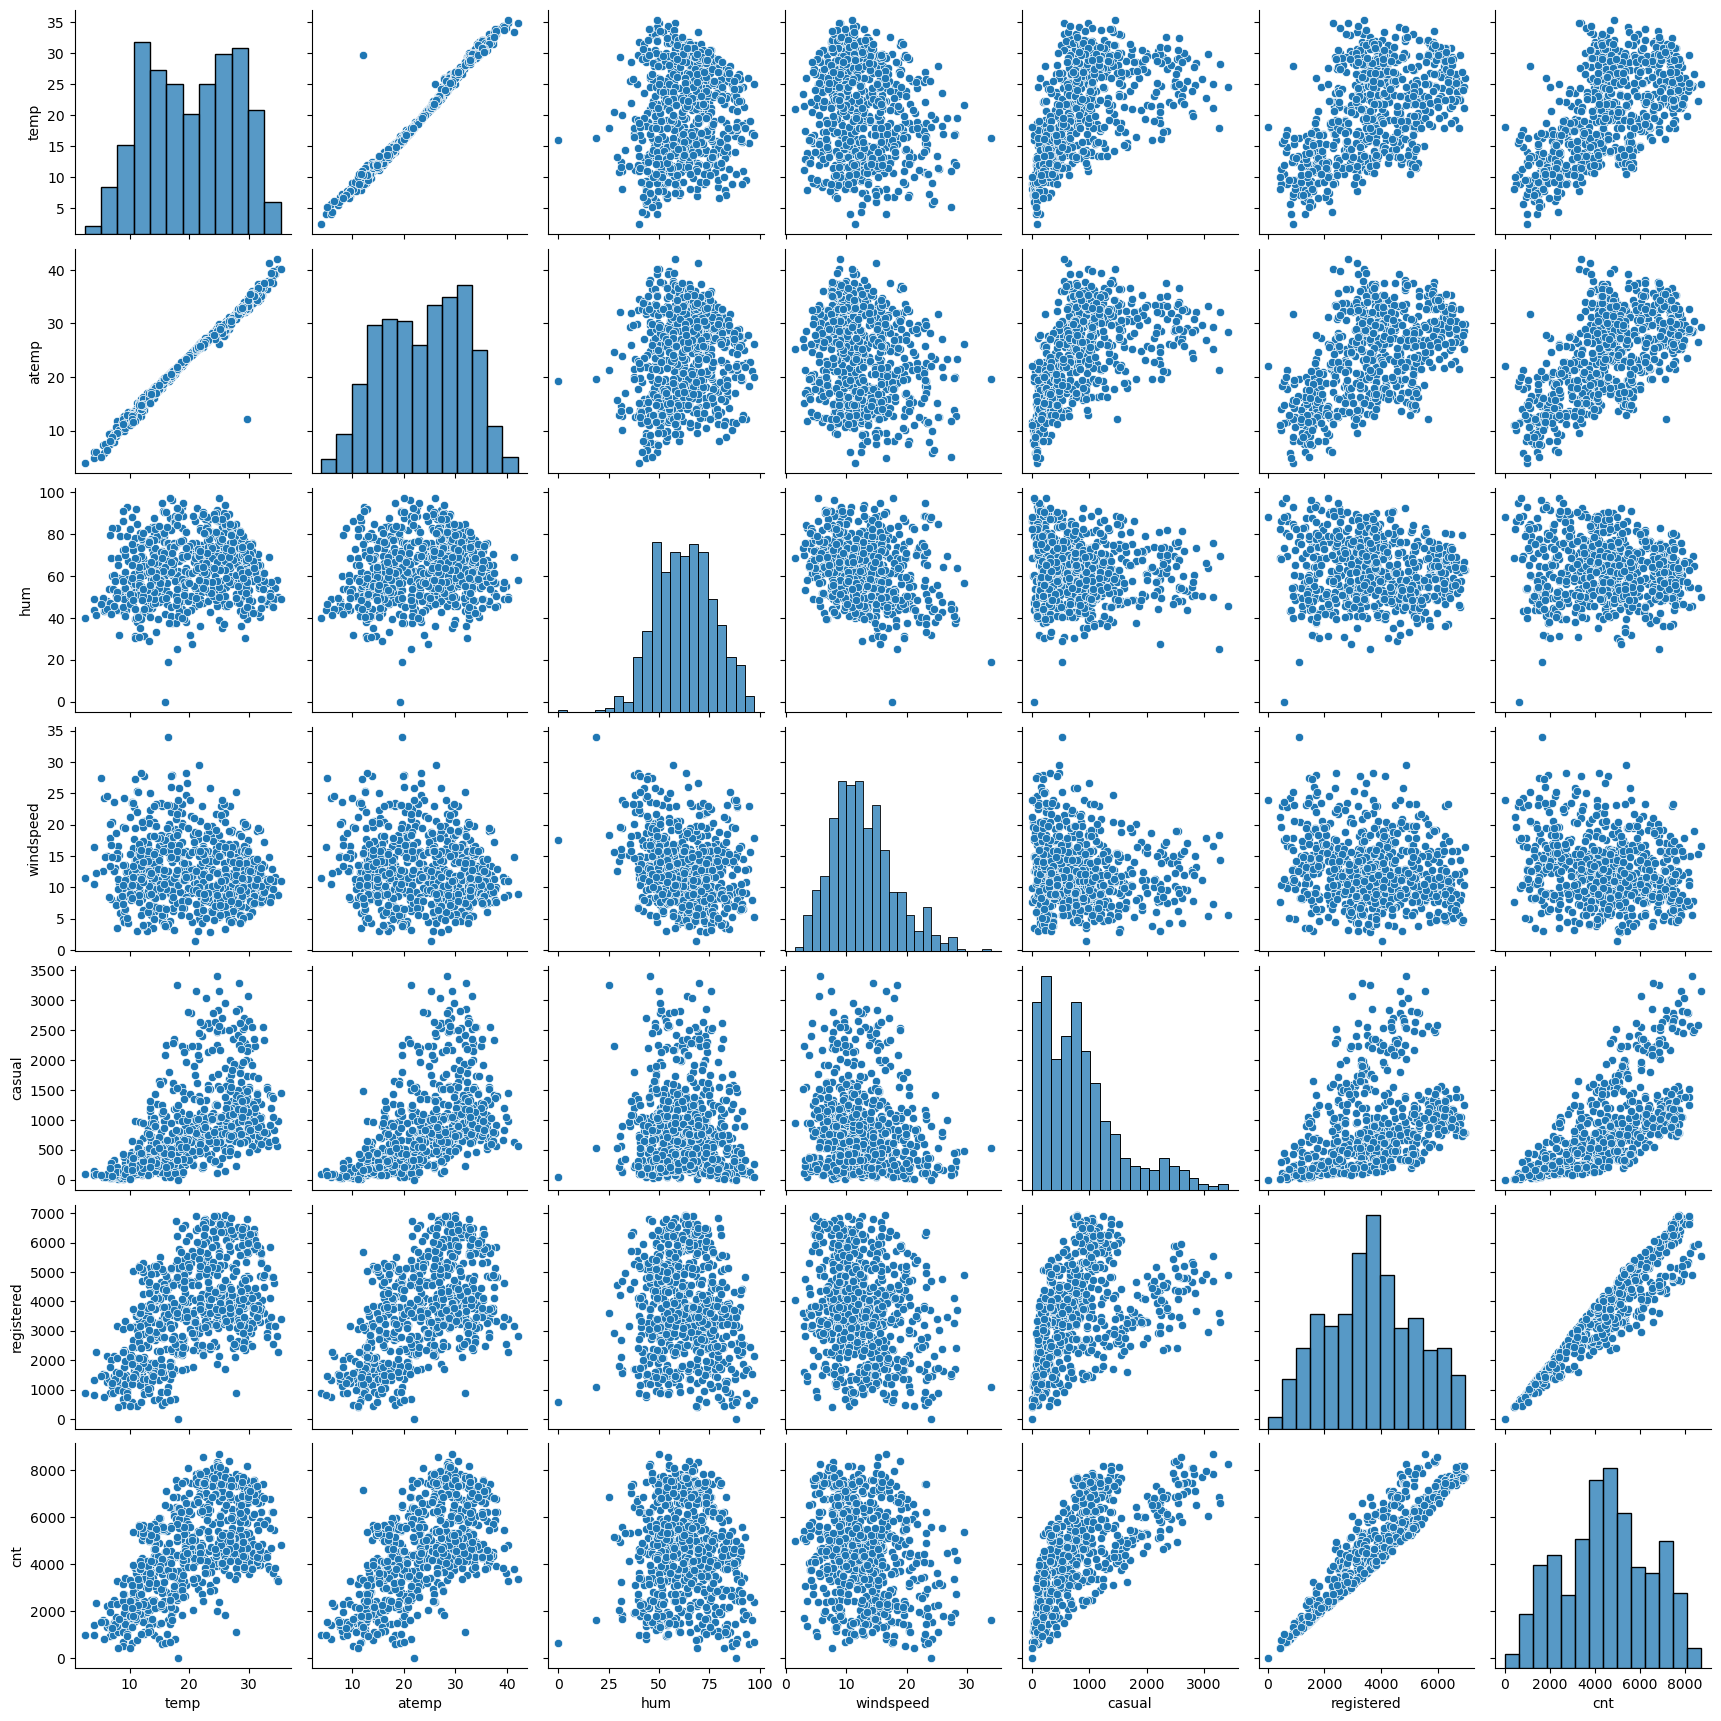

In [6]:
#visualization of numerical variable from the database.
sns.pairplot(bike_sharing[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

<h1 style="font-size: 20px; color: blue;">OBSERVATIONS & UNDERSTANDING</h1>
<h3 style="font-size: 12px; color: purple;">ABOUT DATASET</h3>
Column = 16 Variables
and Rows = 730 as variable data.
<h3 style="font-size: 12px; color: purple;">ABOUT DATASET VARIABLES</h3>
instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt 
<h3 style="font-size: 12px; color: purple;">Out of that 7 are Catagorical variables: season, yr, mnth, holiday, weekday, workingday, weathersit </h3>
<h3 style="font-size: 12px; color: purple;">Out of that 7 are Numerical variables: temp, atemp, hum, windspeed, casual, registered, cnt </h3>
<h3 style="font-size: 12px; color: purple;">Out of that 2 are non-value added variables: instant, dteday </h3>
<h3 style="font-size: 12px; color: purple;">ABOUT PAIRPLOT Understanding</h3>

### Observations from the Pair Plot

1. **`temp` vs. `atemp`**:
   - **Observation**: The variables `temp` and `atemp` appear to be the most correlated.
   - **Reference**: This correlation is evident in both the scatter plot located in **row 1, column 2** and its mirror plot in **row 2, column 1**.
   - **Understanding**: Highly correlated.

2. **`registered` vs. `cnt`**:
   - **Observation**: The variables `registered` and `cnt` are highly correlated.
   - **Reference**: This is visible in the plots located in **row 6, column 7** and **row 7, column 6**.
   - **Understanding**: Highly correlated.

3. **`casual` vs. `cnt`**:
   - **Observation**: A notable correlation exists between `casual` and `cnt`.
   - **Reference**: This is observed in the scatter plots found in **row 5, column 7** and **row 7, column 5**.
   - **Understanding**: Correlated.

4. **`casual` vs. `registered`**:
   - **Observation**: There is a visible correlation between `casual` and `registered`.
   - **Reference**: This can be seen in the plots in **row 5, column 6** and **row 6, column 5**.
   - **Understanding**: Correlated.ding**: correlated        correlated        with total counts.


<h3 style="font-size: 12px; color: magenta;">Step 1.4: Heat-map for correlation matrix</h3>
# Calculate the correlation matrix
# Draw the heatmap

In [7]:
# dropping of the non - value added variables
drop_these_columns = ["instant",
                      "dteday"]
bike_sharing.drop(drop_these_columns, inplace=True, axis=1)
bike_sharing.shape

(730, 14)

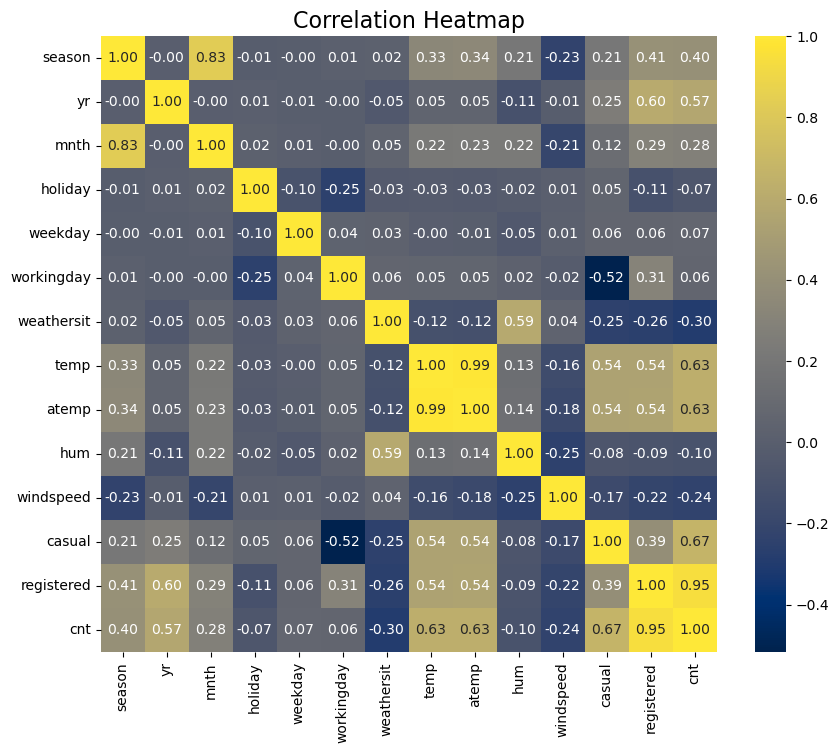

In [8]:
correlation_matrix = bike_sharing.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='cividis', square=True)

# Title for the heatmap
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Understanding the Correlation Heatmap

The correlation heatmap visualizes the linear relationship between pairs of variables in your dataset, with values ranging from -1 to 1
. Positive values indicate a positive correlation
N negative values indicate a negative correlation
. The closer the value is to 1 or -1, the stronger the correlatiop:

1. **`temp` vs. `atemp`**:
   - **Correlation Coefficient**: 0.99
   - **Understanding**: These variables are almost perfectly corr.temp`.

2. **`registered` vs. `cnt`**:
   - **Correlation Coefficient**: 0.95
   - **UnderstThese variables areThere is a very strong positive c,and `cnt`, indicating that the number of registered users is a major contributor to the tot (`cnt`) of users.

3. **`casual` vs. `cnt`**:
   - **Correlation Coefficient**: 0.67
   - **UndThese variables are**: There is a moderately strong positiual` and `cnt`, meaning that casual users also contribute significantly to the total count, though not as much as registered users.

4. **`temp` vs. `cnt`**:
   - **Correlation Coefficient**: 0.63
   - *These variables areding**: There is a moderate po, `temp` and `cnt`, indicating that higher temperatures generally lead to an increase in the total number of users.

5. **`casual` vs. `registered`**:
   - **Correlation Coefficient**: 0.39
   - These variables arestanding**: There is a weak to moderansual` and `registered`, which may suggest that days with more casual users tend to have more registered users as well, but the relationship is not as strong.

6. **`workingday` vs. `casual`**:
   - **Correlation Coefficient**: -0.52These variables arenderstanding**: There is a mod `workingday` and `casual`, indicating that there are fewer ca.e on weekends or holidays.

7. **`temp` vs. `season`**:
   - **Correlation Coefficient**: These variables are **Understanding**: There ion between `temp` and `season`, which is expected as temperature varies significantly with seasons.

8. **`hum` vs. `weathersit`**:
   - **Correlation CoefficientThese variables are   - **Understandid `weathersit` (weather situation), suggesting that worse weather conditions tend to be more humid.

### General Insights:
- **High Correlations**: `temp` vs. `atemp`, `registered` vs. `cnt`, and `temp` vs. `season` show the strongest positive correlations, indicating closely related variables.
- **Moderate Correlations**: `casual` vs. `cnt` and `hum` vs. `weathersit` show moderate correlations, providing insights into user behavior patterns and weather influence.
- **Negative Correlations**: The correlation between `workingday` and `casual` is negative, indicating that ronmental factors on bike-sharing usage.


<h3 style="font-size: 12px; color: magenta;">Step 1.5: Data cleaning as needed</h3>
# Drop-off non- value added variables
# map catagorical variable with respective catagory.

<h3 style="font-size: 12px; color: magenta;">Step 1.5: Data cleaning as needed(continue)</h3>
# Drop-off non- value added variables
# map catagorical variable with respective catagory.

In [9]:
# To make the above assumptions concrete Creating the dummy variable for the 4 categorical variables like "season","mnth","weekday",weathersit" by creating the category.
#mapping season as 1: "spring", 2: "summer", 3: "fall", 4: "winter"
#mapping month as 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
#mapping weekday as 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
#mapping weathersit as {1:'clear', 2:'mist', 3:'snow', 4:'rainy'}
#mapping holiday as {1:'Yes', 0:'No'}
#mapping working day as {1:'Yes', 0:'No'}

# Mapping season values to their respective categories
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
bike_sharing['season'] = bike_sharing['season'].map(season_mapping)

# Mapping mnth values to their respective categories
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bike_sharing['mnth'] = bike_sharing['mnth'].map(month_mapping)

# Mapping week values to their respective categories
week_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'}
bike_sharing['weekday'] = bike_sharing['weekday'].map(week_mapping)

# Mapping weathersit values to their respective categories
weather_mapping = {1:'clear', 2:'mist', 3:'snow', 4:'rainy'}
bike_sharing['weathersit'] = bike_sharing['weathersit'].map(weather_mapping)

# Mapping holiday values to their respective categories
#holiday_mapping = {1:'Yes', 0:'No'}
#bike_sharing['holiday'] = bike_sharing['holiday'].map(holiday_mapping)

# Mapping workingday values to their respective categories
#workingday_mapping = {1:'Yes', 0:'No'}
#bike_sharing['workingday'] = bike_sharing['workingday'].map(workingday_mapping)

# Display the first few rows to verify the changes
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tues,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#overall database information after mapping
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [11]:
#summary statistics of database after mapping.
bike_sharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<h3 style="font-size: 12px; color: magenta;">Step 1.6: Understanding catagorical Variables</h3>
# 

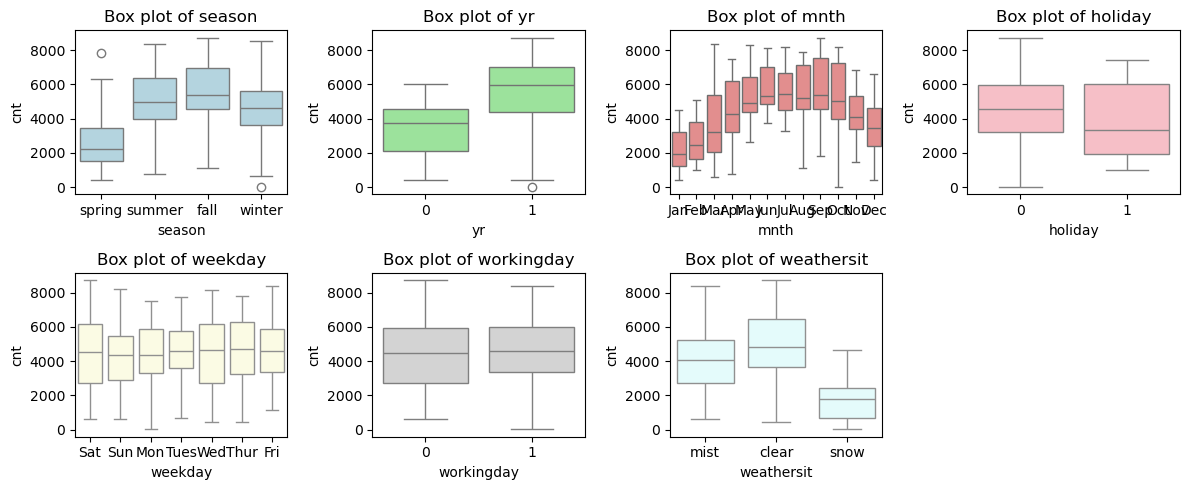

In [12]:
# Custom color palette
custom_palette = {"season": "lightblue","yr": "lightgreen","mnth": "lightcoral","holiday": "lightpink","weekday": "lightyellow","workingday": "lightgray","weathersit": "lightcyan"}
# Visualization of categorical variables using box plots
plt.figure(figsize=(12, 5))

for idx, col in enumerate(["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"], start=1):
    plt.subplot(2, 4, idx)
    sns.boxplot(x=col, y="cnt", data=bike_sharing, palette=[custom_palette[col]])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

### Box Plot Observations

1. **Season vs. Count (`season` vs. `cnt`)**:
   - The median count (`cnt`) varies significantly across different seaso(Eg: Season 3 fall has highest count
ear.

2. **Year vs. Count (`yr` vs. `cnt`)**:
   - The count is higher in the second year (`yr = 1`) compared to the first year (`,  but the median is noticeably higher in the second year.

3. **Month vs. Count (`mnth` vs. `cnt`)**:
   - There is a clear seasonal trend, with counts increasing during the middle months of the year (likely spring and summer) and decreasing in the wi
     these times.

4. **Holiday vs. Count (`holiday` vs. `cnt`)**:
   - The median count is slightly lo(`holiday = 1`) compared, o - However, the overall distribution is quite similar, indicating that holidays don't drastically affect bike rentals.

5. **Weekday vs. Count (`weekday` vs. `cnt`)**:
   - The median count remains relatively consistent acros, read across weekdays suggest that bike rentals do not vary much based on the day of the week.

6. **Working Day vs. Count (`workingday` vs. `cnt`)**:
   - There is no significant difference between working days and non-working days in t, ibutions appear similar, indicating that bike rentals are consistent regardless of whether it's a working day or not.

7. **Weather Situation vs. Count (`weathersit` vs. `cnt`)**:
   - The median count decreases as the weather situation wosnowl, bad weather) has the lowest, showing that poor weather coditions reduce bike rentals.


<h3 style="font-size: 12px; color: magenta;">Step 1.7: Creating the new data set for modeling</h3>
#Assigning the catagory to the catagorical variable
#Creating Dummies
#validating new shape

In [13]:
bikeshare_new=bike_sharing[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]
bikeshare_new['season']=bikeshare_new['season'].astype('category')
bikeshare_new['weathersit']=bikeshare_new['weathersit'].astype('category')
bikeshare_new['mnth']=bikeshare_new['mnth'].astype('category')
bikeshare_new['weekday']=bikeshare_new['weekday'].astype('category')
print(bikeshare_new.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB
None 



In [14]:
# Assuming 'bikeshare_new' is your DataFrame
bikeshare_new = pd.get_dummies(bikeshare_new, drop_first=True)

# Convert boolean or uint8 dummies to uint
for col in bikeshare_new.select_dtypes(include=['bool', 'uint8']).columns:
    bikeshare_new[col] = bikeshare_new[col].astype('uint')

# Verify the data types after conversion
print(bikeshare_new.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   season_spring    730 non-null    uint32 
 9   season_summer    730 non-null    uint32 
 10  season_winter    730 non-null    uint32 
 11  mnth_Aug         730 non-null    uint32 
 12  mnth_Dec         730 non-null    uint32 
 13  mnth_Feb         730 non-null    uint32 
 14  mnth_Jan         730 non-null    uint32 
 15  mnth_Jul         730 non-null    uint32 
 16  mnth_Jun         730 non-null    uint32 
 17  mnth_Mar        

In [15]:
bikeshare_new.shape

(730, 30)

<h3 style="font-size: 24px; color: Maroon">Step 2: Performing Linear Regression </h3>

<h3 style="font-size: 12px; color: magenta;">Step 2.1: Train and Test</h3>
# 70:30

In [16]:
bike_sharing_train , bike_sharing_test = train_test_split(bikeshare_new, train_size=0.7, random_state=100)
bike_sharing_train.shape
bike_sharing_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,13.803347,16.09770,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,0,0,1,0,0,0,0,1,0
79,0,0,1,17.647835,20.48675,73.7391,19.348461,2077,0,1,...,0,0,1,0,0,0,0,0,1,0


In [17]:
bike_sharing_test.shape
bike_sharing_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,1,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,1,0,0,0,0,0,0,1,1,0
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,1,0,...,0,0,1,0,0,0,0,0,0,0


<h3 style="font-size: 12px; color: magenta;">Step 2.2:Visualize Trained data</h3>
# Pair plot

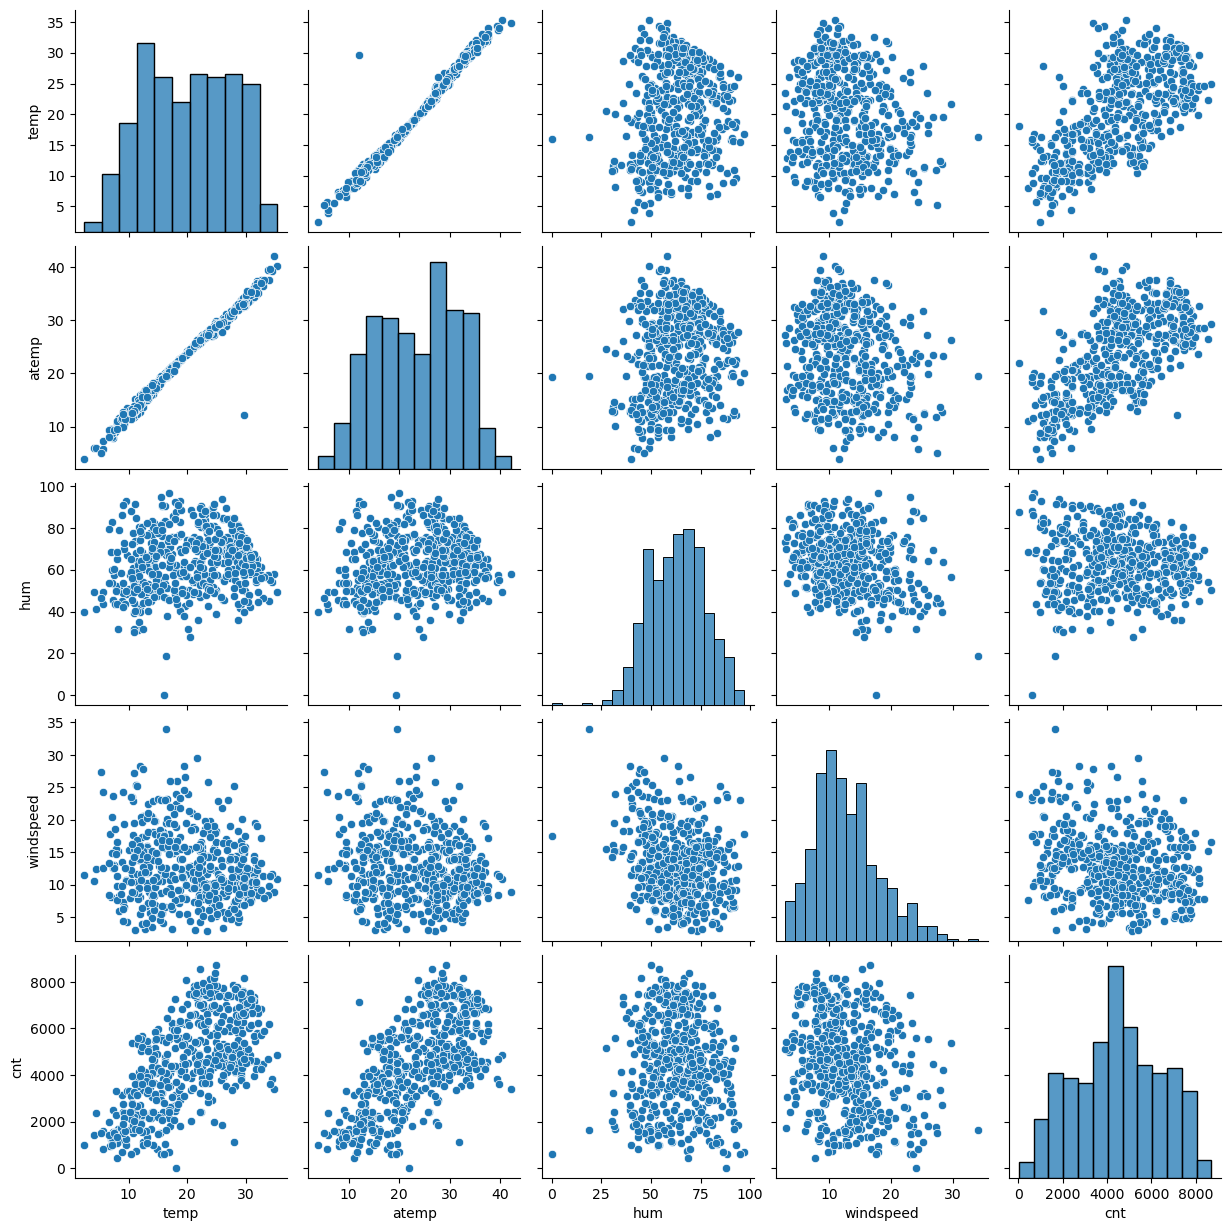

In [18]:
#visualization of numerical variable from the database.
sns.pairplot(bike_sharing_train[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

<h3 style="font-size: 12px; color: magenta;">Step 2.3:Scaling data</h3>
# MinMax scaling: all values have been mapped between 0 and 1 where maximum value is 1 and minimum value is 0
# After scaling data describing to understand

In [19]:
# List of numerical columns to scale
scaling_variables = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
bike_sharing_train[scaling_variables] = scaler.fit_transform(bike_sharing_train[scaling_variables])

# Display the updated DataFrame
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


In [20]:
bike_sharing_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tues',
       'weekday_Wed', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')

In [21]:
bike_sharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3 style="font-size: 24px; color: Maroon">Step 3: Building Linear model - 1 </h3>

<h3 style="font-size: 12px; color: magenta;">Step 3.1:creating X and Y Variables</h3>
# Defining 'cnt' as it is the combination of both registered and casual will hold the whole data.

In [22]:
y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

<h3 style="font-size: 20px; color: magenta;">Step 3.2:LinearRegression function from SciKit Learn</h3>
# Initialize the model
# Extract selected and rejected features
# Recursive Feature Elimination (RFE)

In [23]:
# Initialize the model
model = LinearRegression()
model.fit(X_train, y_train)
rfe = RFE(model) # running RFE
rfe = rfe.fit(X_train, y_train)
# Combine feature names, selection status, and rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 9),
 ('weekday_Thur', False, 12),
 ('weekday_Tues', False, 11),
 ('weekday_Wed', False, 13),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [24]:
# Extract selected and rejected features
selected_features = X_train.columns[rfe.support_]
rejected_features = X_train.columns[~rfe.support_]

print("Selected features:")
print(selected_features)

print("\nRejected features:")
print(rejected_features)

Selected features:
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')

Rejected features:
Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thur', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')


In [25]:
#Recursive Feature Elimination (RFE)
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]
X_train_rfe = X_train[col]
print(X_train_rfe.head())
print(X_train_rfe.info())

     yr  holiday  workingday      temp       hum  windspeed  season_spring  \
576   1        0           1  0.815169  0.725633   0.264686              0   
426   1        0           0  0.442393  0.640189   0.255342              1   
728   1        0           0  0.245101  0.498067   0.663106              1   
482   1        0           0  0.395666  0.504508   0.188475              0   
111   0        0           1  0.345824  0.751824   0.380981              0   

     season_summer  season_winter  mnth_Jul  mnth_Sep  weekday_Sat  \
576              0              0         1         0            0   
426              0              0         0         0            1   
728              0              0         0         0            0   
482              1              0         0         0            1   
111              1              0         0         0            0   

     weathersit_mist  weathersit_snow  
576                0                0  
426                1          

<h3 style="font-size: 20px; color: magenta;">Step 3.3:LinearRegression function from Stats model</h3>

In [26]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the 1st linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.11e-191
Time:                        22:13:40   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2402      0.036     

In [27]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.42
7,season_summer,2.85
12,weathersit_mist,2.29
0,yr,2.08
11,weekday_Sat,1.97


### Observation and conclusion of the Model 1 
### OLS Regression Results Summary

- **Model Fit**:
  - **R-squared**: 0.847 (84.7% of variance in `cnt` explained)
  - **Adjusted R-squared**: 0.843 (Good fit, adjusted for predictors)
  - **F-statistic**: 195.7 (Model is statistically significant, p < 0.0001)

- **Key Predictors**:
  - **`temp`**: 0.5277 (Positive effect on `cnt`)
  - **`hum`**: -0.1611 (Negative effect on `cnt`)
  - **`windspeed`**: -0.1809 (Negative effect on `cnt`)
  - **`season_spring`**: -0.0555 (Decrease in `cnt` compared to base season)
  - **`season_winter`**: 0.0992 (Increase in `cnt` compared to base season)
  - **Residuals**: Not perfectly normal (Omnibus and Jarque-Bera tests significant)
  - **Condition Number**: 25.2 (Mild multicollinearity)

### VIF Results Summary

- **High VIF Values** (VIF > 10): Indicate severe multicollinearity. Consider removing or combining these features.
    - `hum` - 32.10
    - `temp` - 18.99

- **Moderate VIF Values** (5 ≤ VIF < 10): Indicate some multicollinearity. Review their impact but might be manageable.
    - `workingday` - 5.28
    -  `windspeed` - 4.91
    - `weekday_Sat` - 4.91
    - `season_spring` - 4.80
    - `weekday_Sun` - 4.76

- **Low VIF Values** (VIF < 5): Indicate low multicollinearity and are generally safe to include in the model.
    - `season_winter` - 3.69
    - `season_summer` - 3.04
    - `weathersit_mist` - 2.31
    - `yr` - 2.09
    - `mnth_Jul` - 1.60
    - `mnth_Sep` - 1.38
    - `weathersit_snow` - 1.25
<h3 style="font-size: 20px; color: Olive;">The model is effective but may need refinement due to some issues with residual normality.</h3>

<h3 style="font-size: 24px; color: Maroon">Step 4: Building Linear model - 2 </h3>
#There is no significant difference between working days and non-working days in t, ibutions appear similar, indicating that bike rentals are consistent regardless of whether it's a working day or not. - From catagorical analysis above
<h3 style="font-size: px; color: Maroon">Dropping Working day </h3>

<h3 style="font-size: 12px; color: magenta;">Step 4.1 : creating X and Y Variables for model 2</h3>
# Dropping working day

In [28]:
col_2 = X_train[col].drop(["workingday"], axis=1).columns
X_train_2 = X_train[col_2]  # Now X_train_2 uses the updated column list without 'workingday'
# Adding a constant variable 
X_train_model_2 = sm.add_constant(X_train_2)
model_2 = sm.OLS(y_train, X_train_model_2).fit()  # Running the 2nd linear model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.31e-189
Time:                        22:13:40   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2803      0.035     

In [29]:
# Define the updated DataFrame for VIF calculation
X_train_vif2 = X_train_2.copy()  # Copy the DataFrame for VIF calculation
# Calculate VIF for each feature
vif_2 = pd.DataFrame()
vif_2['Features'] = X_train_vif2.columns
vif_2['VIF'] = [variance_inflation_factor(X_train_vif2.values, i) for i in range(X_train_vif2.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by="VIF", ascending=False)
vif_2

,Features,VIF
3,hum,28.03
2,temp,16.06
4,windspeed,4.67
5,season_spring,4.03
7,season_winter,3.35
6,season_summer,2.79
11,weathersit_mist,2.28
0,yr,2.08
8,mnth_Jul,1.58
9,mnth_Sep,1.39


### Observation and Conclusion of Model 2  
### OLS Regression Results Summary

- **Model Fit**:
  - **R-squared**: 0.843 (84.3% of variance in `cnt` explained)
  - **Adjusted R-squared**: 0.839 (Good fit, adjusted for predictors)
  - **F-statistic**: 204.4 (Model is statistically significant, p < 0.0001)

- **Key Predictors**:
  - **`temp`**: 0.5304 (Positive effect on `cnt`)
  - **`hum`**: -0.1697 (Negative effect on `cnt`)
  - **`windspeed`**: -0.1834 (Negative effect on `cnt`)
  - **`season_spring`**: -0.0564 (Decrease in `cnt` compared to base season)
  - **`season_winter`**: 0.0972 (Increase in `cnt` compared to base season)
  - **`weathersit_mist`**: -0.0532 (Decrease in `cnt` under misty conditions)
  - **`weathersit_snow`**: -0.2381 (Significant decrease in `cnt` under snowy conditions)
  - **Residuals**: Not perfectly normal (Omnibus and Jarque-Bera tests significant)
  - **Condition Number**: 19.6 (Indicating mild multicollinearity)

### VIF Results Summary

- **High VIF Values** (VIF > 10): Indicate severe multicollinearity. Consider removing or combining these features.
    - `hum` - 28.03
    - `temp` - 16.06

- **Moderate VIF Values** (5 ≤ VIF < 10): Indicate some multicollinearity. Review their impact but might be manageable.
    - `windspeed` - 4.67
    - `season_spring` - 4.03

- **Low VIF Values** (VIF < 5): Indicate low multicollinearity and are generally safe to include in the model.
    - `season_winter` - 3.35
    - `season_summer` - 2.79
    - `weathersit_mist` - 2.28
    - `yr` - 2.08
    - `mnth_Jul` - 1.58
    - `mnth_Sep` - 1.39
    - `weathersit_snow` - 1.24
    - `weekday_Sat` - 1.19
    - `holiday` - 1.05

<h3 style="font-size: 20px; color: Olive;">Model 2 demonstrates a strong fit, but there are concerns with multicollinearity, particularly for `hum` and `temp`.</h3>


<h3 style="font-size: 24px; color: Maroon">Step 5: Building Linear model - 3 </h3>
<h3 style="font-size: px; color: Maroon">Dropping hum </h3>

In [30]:
# After creating model 3 and dropping 'hum'
col_3 = X_train[col_2].drop(["hum"], axis=1).columns

X_train_3 = X_train[col_3]  # Now X_train_3 uses the updated column list without 'hum'
# Adding a constant variable 
X_train_model_3 = sm.add_constant(X_train_3)
model_3 = sm.OLS(y_train, X_train_model_3).fit()  # Running the 3rd linear model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.68e-186
Time:                        22:13:40   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1960      0.030     

In [31]:
# Define the updated DataFrame for VIF calculation
X_train_vif3 = X_train_3.copy()  # Copy the DataFrame for VIF calculation
# Calculate VIF for each feature
vif_3 = pd.DataFrame()
vif_3['Features'] = X_train_vif3.columns
vif_3['VIF'] = [variance_inflation_factor(X_train_vif3.values, i) for i in range(X_train_vif3.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by="VIF", ascending=False)
vif_3

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,season_summer,2.23
4,season_spring,2.10
0,yr,2.07
6,season_winter,1.79
7,mnth_Jul,1.58
10,weathersit_mist,1.55
8,mnth_Sep,1.34
9,weekday_Sat,1.19


### Observation and Conclusion of Model 3  
### OLS Regression Results Summary

- **Model Fit**:
  - **R-squared**: 0.836 (83.6% of variance in `cnt` explained)
  - **Adjusted R-squared**: 0.832 (Good fit, adjusted for predictors)
  - **F-statistic**: 211.6 (Model is statistically significant, p < 0.0001)

- **Key Predictors**:
  - **`temp`**: 0.4924 (Positive effect on `cnt`)
  - **`windspeed`**: -0.1500 (Negative effect on `cnt`)
  - **`season_spring`**: -0.0670 (Decrease in `cnt` compared to base season)
  - **`season_winter`**: 0.0816 (Increase in `cnt` compared to base season)
  - **`weathersit_mist`**: -0.0803 (Decrease in `cnt` under misty conditions)
  - **`weathersit_snow`**: -0.2846 (Significant decrease in `cnt` under snowy conditions)
  - **Residuals**: Not perfectly normal (Omnibus and Jarque-Bera tests significant)
  - **Condition Number**: 17.4 (Indicating low multicollinearity)

### VIF Results Summary

- **Moderate VIF Values** (5 ≤ VIF < 10): Indicate some multicollinearity. Review their impact but might be manageable.
    - `temp` - 5.12

- **Low VIF Values** (VIF < 5): Indicate low multicollinearity and are generally safe to include in the model.
    - `windspeed` - 4.62
    - `season_summer` - 2.23
    - `season_spring` - 2.10
    - `yr` - 2.07
    - `season_winter` - 1.79
    - `mnth_Jul` - 1.58
    - `weathersit_mist` - 1.55
    - `mnth_Sep` - 1.34
    - `weekday_Sat` - 1.19
    - `weathersit_snow` - 1.08
    - `holiday` - 1.05

<h3 style="font-size: 20px; color: Olive;">Model 3 is robust with low multicollinearity, but the normality of residuals remains a concern.</h3>

<h3 style="font-size: 24px; color: Maroon">Step 6: Building Linear model - 4 </h3>
<h3 style="font-size: px; color: Maroon">Dropping season summer </h3>

In [32]:
# After creating model 3 and dropping 'season summer'
col_4 = X_train[col_3].drop(["season_summer"], axis=1).columns  # Update the column list after dropping 'temp'

# Create X_train_4 using the updated column list without 'temp'
X_train_4 = X_train[col_4]  
# Adding a constant variable 
X_train_model_4 = sm.add_constant(X_train_4)
model_4 = sm.OLS(y_train, X_train_model_4).fit()   # Running the 4th linear model
# Let's see the summary of our linear model
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.17e-185
Time:                        22:13:40   Log-Likelihood:                 495.57
No. Observations:                 510   AIC:                            -967.1
Df Residuals:                     498   BIC:                            -916.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2501      0.024     

In [33]:
# Define the updated DataFrame for VIF calculation
X_train_vif4 = X_train_4.copy()  # Copy the DataFrame for VIF calculation
# Calculate VIF for each feature
vif_4 = pd.DataFrame()
vif_4['Features'] = X_train_vif4.columns
vif_4['VIF'] = [variance_inflation_factor(X_train_vif4.values, i) for i in range(X_train_vif4.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by="VIF", ascending=False)
vif_4

,Features,VIF
2,temp,4.64
3,windspeed,4.03
0,yr,2.06
4,season_spring,1.66
9,weathersit_mist,1.52
5,season_winter,1.40
6,mnth_Jul,1.35
7,mnth_Sep,1.20
8,weekday_Sat,1.19
10,weathersit_snow,1.08


### Observation and Conclusion of Model 4  
### OLS Regression Results Summary

- **Model Fit**:
  - **R-squared**: 0.833 (83.3% of variance in `cnt` explained)
  - **Adjusted R-squared**: 0.829 (Good fit, adjusted for predictors)
  - **F-statistic**: 226.1 (Model is statistically significant, p < 0.0001)

- **Key Predictors**:
  - **`temp`**: 0.4509 (Positive effect on `cnt`)
  - **`windspeed`**: -0.1415 (Negative effect on `cnt`)
  - **`season_spring`**: -0.1124 (Significant decrease in `cnt` compared to base season)
  - **`season_winter`**: 0.0445 (Increase in `cnt` compared to base season)
  - **`weathersit_mist`**: -0.0797 (Decrease in `cnt` under misty conditions)
  - **`weathersit_snow`**: -0.2859 (Significant decrease in `cnt` under snowy conditions)
  - **Residuals**: Not perfectly normal (Omnibus and Jarque-Bera tests significant)
  - **Condition Number**: 14.1 (Indicating low multicollinearity)

### VIF Results Summary

- **Moderate VIF Values** (5 ≤ VIF < 10): Indicate some multicollinearity. Review their impact but might be manageable.
    - None

- **Low VIF Values** (VIF < 5): Indicate low multicollinearity and are generally safe to include in the model.
    - `temp` - 4.64
    - `windspeed` - 4.03
    - `yr` - 2.06
    - `season_spring` - 1.66
    - `weathersit_mist` - 1.52
    - `season_winter` - 1.40
    - `mnth_Jul` - 1.35
    - `mnth_Sep` - 1.20
    - `weekday_Sat` - 1.19
    - `weathersit_snow` - 1.08
    - `holiday` - 1.05

<h3 style="font-size: 20px; color: Olive;">Model 4 has a good fit with low multicollinearity but shows issues with residual normality.</h3>


<h3 style="font-size: 24px; color: Maroon">Step 7: Building Linear model - 5 </h3>
<h3 style="font-size: px; color: Maroon">Dropping weekday_Sat </h3>

In [34]:
# After creating model 4 and dropping 'weekday_Sat'
# Update the column list after dropping 'weekday_Sat'
col_5 = X_train[col_4].drop(["weekday_Sat"], axis=1).columns  

# Create X_train_5 using the updated column list without 'season_summer'
X_train_5 = X_train[col_5]  
# Adding a constant variable 
X_train_model_5 = sm.add_constant(X_train_5)
model_5 = sm.OLS(y_train, X_train_model_5).fit()   # Running the 5th linear model
# Let's see the summary of our linear model
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.10e-186
Time:                        22:13:41   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2531      0.024     

In [35]:
# Define the updated DataFrame for VIF calculation
X_train_vif5 = X_train_5.copy()  # Copy the DataFrame for VIF calculation
# Calculate VIF for each feature
vif_5 = pd.DataFrame()
vif_5['Features'] = X_train_vif5.columns
vif_5['VIF'] = [variance_inflation_factor(X_train_vif5.values, i) for i in range(X_train_vif5.shape[1])]
vif_5['VIF'] = round(vif_5['VIF'], 2)
vif_5 = vif_5.sort_values(by="VIF", ascending=False)
vif_5

,Features,VIF
2,temp,4.61
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.64
8,weathersit_mist,1.52
5,season_winter,1.39
6,mnth_Jul,1.35
7,mnth_Sep,1.20
9,weathersit_snow,1.08
1,holiday,1.04


### Observation and Conclusion of Model 5  
### OLS Regression Results Summary

- **Model Fit**:
  - **R-squared**: 0.832 (83.2% of variance in `cnt` explained)
  - **Adjusted R-squared**: 0.829 (Good fit, adjusted for predictors)
  - **F-statistic**: 247.5 (Model is statistically significant, p < 0.0001)

- **Key Predictors**:
  - **`temp`**: 0.4498 (Positive effect on `cnt`)
  - **`windspeed`**: -0.1395 (Negative effect on `cnt`)
  - **`season_spring`**: -0.1123 (Decrease in `cnt` compared to base season)
  - **`season_winter`**: 0.0449 (Increase in `cnt` compared to base season)
  - **`weathersit_mist`**: -0.0796 (Decrease in `cnt` under misty conditions)
  - **`weathersit_snow`**: -0.2855 (Significant decrease in `cnt` under snowy conditions)
  - **Residuals**: Not perfectly normal (Omnibus and Jarque-Bera tests significant)
  - **Condition Number**: 14.0 (Indicating low multicollinearity)

### VIF Results Summary

- **Moderate VIF Values** (5 ≤ VIF < 10): Indicate some multicollinearity. Review their impact but might be manageable.
    - None

- **Low VIF Values** (VIF < 5): Indicate low multicollinearity and are generally safe to include in the model.
    - `temp` - 4.61
    - `windspeed` - 4.00
    - `yr` - 2.06
    - `season_spring` - 1.64
    - `weathersit_mist` - 1.52
    - `season_winter` - 1.39
    - `mnth_Jul` - 1.35
    - `mnth_Sep` - 1.20
    - `weathersit_snow` - 1.08
    - `holiday` - 1.04

<h3 style="font-size: 20px; color: Olive;">Model 5 is the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.</h3>


<h3 style="font-size: 24px; color: Maroon">Step 8: Residual Analysis of the train data </h3>

<h3 style="font-size: 12px; color: magenta;">Step 8.1 : Residual Analysis of the train data</h3>
# Calculating residuals
# Predicting values using last model
# performing Residual Analysis
# ploting Residual Analysis

In [36]:
y_train_cnt = model_5.predict(X_train_model_5)
## Looking at the RMSE

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.09183948660631576

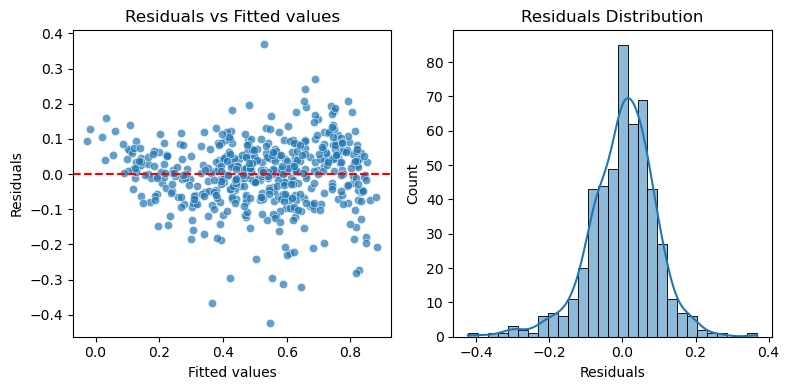

In [37]:
# Predicting values using Model 5
y_train_pred = model_5.predict(X_train_model_5)

# Calculating residuals
residuals = y_train - y_train_pred

# Residual Analysis
plt.figure(figsize=(8, 4))

# Residuals vs Fitted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Q-Q plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

<h3 style="font-size: 12px; color: magenta;">Step 8.2 : understanding model through residuals</h3>
# Q-Q Plot
# Scatter Plot

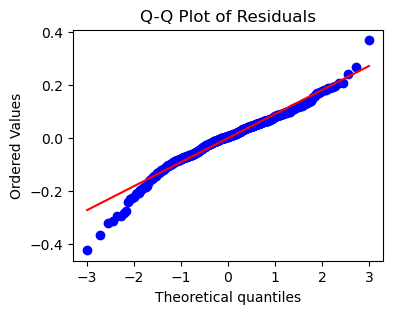

In [38]:
# Q-Q plot
plt.figure(figsize=(4, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Key Points from Q-Q Plot

1. **Normality Check**: Residuals are generally close to normal, as most points align with the red line.
2. **Central Alignment**: Residuals near the center are well-distributed.
3. **Tail Deviation**: Residuals in the tails deviate from the line, indicating potential outliers or non-normality.
4. **Conclusion**: Residuals are approximately normal with slight issues at the extremes.

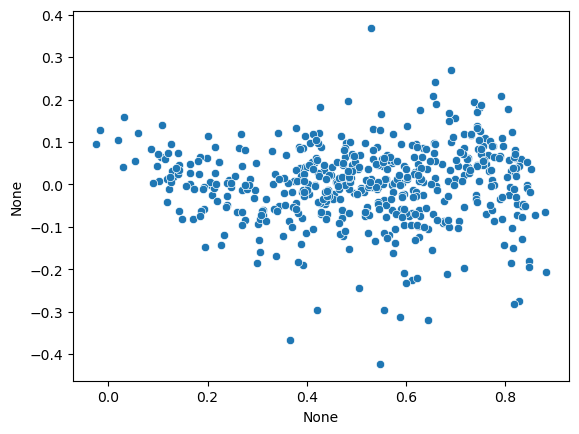

In [39]:
sns.scatterplot(x=y_train_pred, y=residuals)
plt.show()

<h3 style="font-size: 24px; color: Maroon">Step 9: Making Predictions Using the Final Model </h3>

<h3 style="font-size: 12px; color: magenta;">Step 9.1 : Applying the scaling on the test sets</h3>
# applying the predictions using the final model
# Looking into the head details
# Looking the statistics details

In [40]:
scaling_variables = ["temp", "atemp", "hum", "windspeed", "cnt"]
bike_sharing_test[scaling_variables] = scaler.fit_transform(bike_sharing_test[scaling_variables])
# Display the updated DataFrame
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [41]:
bike_sharing_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3 style="font-size: 12px; color: magenta;">Step 9.2 : Dividing into X_test and y_test</h3>
#

In [42]:
y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test

In [43]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_fm = X_test[X_train.columns]
# Adding constant variable to test dataframe
X_test_fm = sm.add_constant(X_test_fm)

In [44]:
8# Columns in the training set
train_columns = X_train_model_5.columns

# Columns in the test set
test_columns = X_test_fm.columns

# Find columns that are in the training set but not in the test set
dropped_in_test = list(set(train_columns) - set(test_columns))
print(f"Columns present in training set but missing in test set: {dropped_in_test}")

# Find columns that are in the test set but not in the training set
extra_in_test = list(set(test_columns) - set(train_columns))
print(f"Columns present in test set but missing in training set: {extra_in_test}")

Columns present in training set but missing in test set: []
Columns present in test set but missing in training set: ['mnth_Oct', 'workingday', 'hum', 'weekday_Tues', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'weekday_Wed', 'weekday_Mon', 'weekday_Thur', 'weekday_Sat', 'mnth_Mar', 'atemp', 'mnth_Jun', 'mnth_May', 'season_summer', 'mnth_Aug', 'weekday_Sun', 'mnth_Nov']


In [45]:
# Drop extra columns that are not in the training set
X_test_fm = X_test_fm[train_columns]

In [46]:
# Making predictions
y_pred = model_5.predict(X_test_fm)

<h3 style="font-size: 12px; color: magenta;">Step 9.3 : Model Evaluation</h3>
#

Text(0, 0.5, 'y_pred')

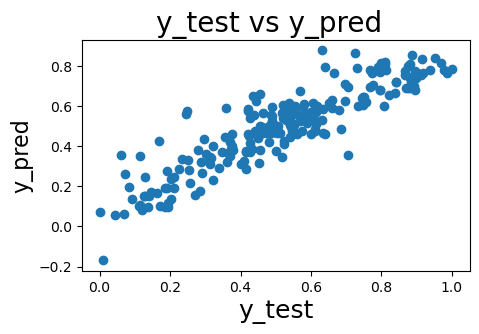

In [47]:
# Plotting y_test and y_pred to understand the spread
# Set the figure size (width, height) in inches
fig = plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

<h3 style="font-size: 12px; color: magenta;">Step 9.3 : Looking at the RMSE</h3>
#

In [48]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10822491487084021

In [49]:
R2 = r2_score(y_test, y_pred)
R2

0.7948702608421846

In [50]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.7829209556485255

In [51]:
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.10e-186
Time:                        22:13:42   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2531      0.024     

<h3 style="font-size: 28px; color: maroon;">Step 10: Conclusion</h3>
#Best fitted line
#Summary of Train and Test set
#Predicted variable as per the model in bike rental strategy

We can see that the equation of our best fitted line is:

```python
cnt = 0.2531 + 0.2342 * yr - 0.0980 * holiday + 0.4498 * temp - 0.1395 * windspeed - 0.1123 * season_spring + 0.0449 * season_winter - 0.0729 * mnth_Jul + 0.0573 * mnth_Sep - 0.0796 * weathersit_mist - 0.2855 * weathersit_sow


In [52]:
summary_df = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":[0.832,0.829,0.09183],
                         "Test Set":[0.794,0.7829,0.1082]})
summary_df

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,0.83200,0.7940
1,Adjusted R-Squared Value,0.82900,0.7829
2,RMSE,0.09183,0.1082


<h3 style="font-size: 20px; color: Olive;">From the derived model, the following predictors are statistically significant. Therefore, the company should consider these predictor variables while preparing the bike rental strategy:</h3>

- `yr`
- `holiday`
- `temp`
- `windspeed`
- `season_spring`
- `season_winter`
- `mnth_Jul`
- `mnth_Sep`
- `weathersit_mist`
- `weathersit_snow`
